In [3]:
import pandas as pd
data = pd.read_csv("./dataset/iris.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
labels, label_unique = pd.factorize(data["Species"])

In [6]:
data["Species"] = labels

In [7]:
label_unique

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [8]:
X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1].values
X,Y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [9]:
import torch.nn as nn
import torch
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [10]:
x_train,  x_test,y_train, y_test = train_test_split(X,Y,test_size=0.3)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [11]:
x_train = torch.from_numpy(x_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.long)
x_test = torch.from_numpy(x_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.long)

In [12]:
x_train.shape,y_train.shape

(torch.Size([105, 4]), torch.Size([105]))

In [13]:
from torch.utils.data import   TensorDataset, DataLoader
batch_size = 8
train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)
test_ds = TensorDataset(x_test,y_test)
test_dl = DataLoader(test_ds,batch_size=batch_size)

In [14]:
class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear1 = nn.Linear(4,32)
        self.linear2 = nn.Linear(32,32)
        self.linear3 = nn.Linear(32,3)
    def forward(self,inputs):
        x = self.linear1(inputs)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x



In [15]:
def get_model():
    model = Model()
    opt = torch.optim.Adam(model.parameters(),lr=0.001)
    return model, opt

In [16]:
def get_accuracy(y_pred,y):
    return (torch.argmax(y_pred,dim=1).numpy() == np.array(y)).astype(float).mean()

In [17]:
model, opt  = get_model()
loss_fn = nn.CrossEntropyLoss()

In [18]:
input_x = torch.rand((2,4))
input_x
# y_predict = model(input_x)

tensor([[0.4010, 0.4685, 0.6251, 0.2917],
        [0.0971, 0.4425, 0.7356, 0.1658]])

In [19]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

epochs = 20
for epoch in range(epochs):
    for x, y in train_dl:
        y_predict = model(x)
        loss = loss_fn(y_predict, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
    with torch.no_grad():
        epoch_acc_train = get_accuracy(model(x_train),y_train)
        epoch_loss_train = loss_fn(model(x_train),y_train).data
        epoch_acc_test = get_accuracy(model(x_test),y_test)
        epoch_loss_test = loss_fn(model(x_test),y_test).data
        print('epoch: ', epoch, 'loss： ', round(epoch_loss_train.item(), 3),
                        'accuracy:', round(epoch_acc_train.item(), 3),
                        'test_loss： ', round(epoch_loss_test.item(), 3),
                        'test_accuracy:', round(epoch_acc_test.item(), 3))

        train_loss.append(round(epoch_loss_train.item(), 3))
        train_acc.append(round(epoch_acc_train.item(), 3))
        test_loss.append(round(epoch_loss_test.item(), 3))
        test_acc.append(round(epoch_acc_test.item(), 3))
        

epoch:  0 loss：  0.993 accuracy: 0.381 test_loss：  1.052 test_accuracy: 0.222
epoch:  1 loss：  0.891 accuracy: 0.676 test_loss：  0.993 test_accuracy: 0.556
epoch:  2 loss：  0.789 accuracy: 0.705 test_loss：  0.848 test_accuracy: 0.578
epoch:  3 loss：  0.7 accuracy: 0.705 test_loss：  0.798 test_accuracy: 0.578
epoch:  4 loss：  0.617 accuracy: 0.705 test_loss：  0.698 test_accuracy: 0.578
epoch:  5 loss：  0.552 accuracy: 0.705 test_loss：  0.637 test_accuracy: 0.578
epoch:  6 loss：  0.501 accuracy: 0.705 test_loss：  0.584 test_accuracy: 0.578
epoch:  7 loss：  0.46 accuracy: 0.733 test_loss：  0.533 test_accuracy: 0.578
epoch:  8 loss：  0.429 accuracy: 0.752 test_loss：  0.503 test_accuracy: 0.578
epoch:  9 loss：  0.402 accuracy: 0.962 test_loss：  0.435 test_accuracy: 0.889
epoch:  10 loss：  0.379 accuracy: 0.79 test_loss：  0.463 test_accuracy: 0.711
epoch:  11 loss：  0.353 accuracy: 0.962 test_loss：  0.389 test_accuracy: 0.911
epoch:  12 loss：  0.332 accuracy: 0.876 test_loss：  0.402 test_acc

In [20]:
import matplotlib.pyplot as plt

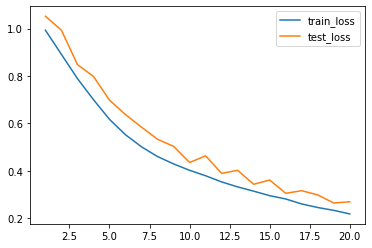

In [21]:
plt.plot(range(1, epochs+1), train_loss, label='train_loss')
plt.plot(range(1, epochs+1), test_loss, label='test_loss')
plt.legend()

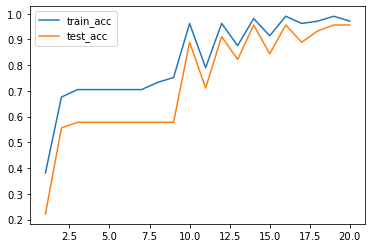

In [22]:
plt.plot(range(1, epochs+1), train_acc, label='train_acc')
plt.plot(range(1, epochs+1), test_acc, label='test_acc')
plt.legend()

## 模版代码

1. 创建输入（dataloader）
2. 创建模型（model）
3. 创建损失函数

编写一个fit，输入模型、输入数据（train_dl, test_dl）, 对数据输入在模型上训练,并且返回loss和acc变化

In [26]:
def fit(epoch,  model, trainloader, testloader):
    correct = 0
    total = 0 
    running_loss = 0
    for x,y in trainloader:
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0

    with torch.no_grad():
        for x, y in testloader:
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total
        
        
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [23]:
model = Model()
opt= torch.optim.Adam(model.parameters(), lr=0.0001)

In [24]:
epochs = 20

In [27]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 train_dl,
                                                                 test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch:  0 loss：  0.167 accuracy: 0.324 test_loss：  0.155 test_accuracy: 0.356
epoch:  1 loss：  0.155 accuracy: 0.324 test_loss：  0.151 test_accuracy: 0.356
epoch:  2 loss：  0.157 accuracy: 0.324 test_loss：  0.148 test_accuracy: 0.356
epoch:  3 loss：  0.147 accuracy: 0.324 test_loss：  0.145 test_accuracy: 0.356
epoch:  4 loss：  0.145 accuracy: 0.324 test_loss：  0.142 test_accuracy: 0.356
epoch:  5 loss：  0.142 accuracy: 0.324 test_loss：  0.14 test_accuracy: 0.356
epoch:  6 loss：  0.145 accuracy: 0.324 test_loss：  0.138 test_accuracy: 0.356
epoch:  7 loss：  0.138 accuracy: 0.324 test_loss：  0.137 test_accuracy: 0.356
epoch:  8 loss：  0.14 accuracy: 0.324 test_loss：  0.135 test_accuracy: 0.356
epoch:  9 loss：  0.138 accuracy: 0.324 test_loss：  0.134 test_accuracy: 0.356
epoch:  10 loss：  0.133 accuracy: 0.324 test_loss：  0.133 test_accuracy: 0.356
epoch:  11 loss：  0.135 accuracy: 0.352 test_loss：  0.132 test_accuracy: 0.4
epoch:  12 loss：  0.133 accuracy: 0.6 test_loss：  0.13 test_accura

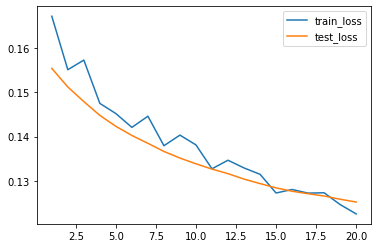

In [28]:
plt.plot(range(1, epochs+1), train_loss, label='train_loss')
plt.plot(range(1, epochs+1), test_loss, label='test_loss')
plt.legend()

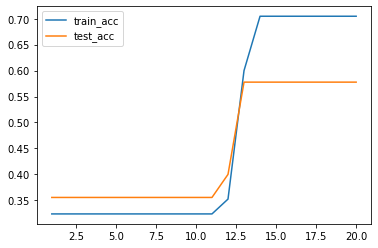

In [29]:
plt.plot(range(1, epochs+1), train_acc, label='train_acc')
plt.plot(range(1, epochs+1), test_acc, label='test_acc')
plt.legend()